# Análisis Y Segmetnacion De Cleintes En Un E-commerce

## 1. Analisis Y Limpieza Del Dataset

### 1.1 Liberias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### 1.2 Carga Del DataFrame

In [2]:
df = pd.read_excel('Online Retail.xlsx')

### 1.3 Exploracion Del DataFrame

In [3]:
print(f"\nDimensión del dataset: {df.shape[0]} filas, y {df.shape[1]} columnas")
print(f"\nColumnas y tipos de datos: {df.info()}")
print(f"\nValores nulos por columna:{df.isnull().sum()}")


Dimensión del dataset: 541909 filas, y 8 columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

Columnas y tipos de datos: None

Valores nulos por columna:InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


https://archive.ics.uci.edu/dataset/352/online+retail De esta web podemos confirmar que las columnas representan los siguientes valores:

InvoiceNo: Número de factura único para cada transacción (si empieza con ‘C’ es una cancelación).

StockCode: Código único de producto.

Description: Nombre del producto.

Quantity: Cantidad de productos vendidos en esa línea de factura.

InvoiceDate: Día y hora de la transacción.

UnitPrice: Precio unitario (en libras esterlinas).

CustomerID: Identificador único del cliente.

Country: País del cliente.

Como el objetivo es idtificar patrones de compra y segmentar clinentes, es necesario realizar una limpienza el las columnas de CustomerID, ya que posee 135080 ususrios no odetificados, los cuales no son utiles para este analisis, los mismo con la columna Description, en la cual hay 1454 productos no idetificados.

In [5]:
df['CustomerID'].nunique(dropna=True)

4372

Esto indica que, después de eliminar los nulos, hay 4,372 clientes únicos en el dataset. Aunque el dataset tiene más de medio millon de transacciones, estas solo pertenecen a 4,372 clientes diferentes, esto se debe a que son clientes que realizan comprar al mayor.
https://archive.ics.uci.edu/dataset/352/online+retail

El RFM, el clustering y las prediciones, se harán sobre estos clientes.

In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Quantity negativo: normalmente son devoluciones,
UnitPrice negativo: es un error o son devoluciones.

In [7]:
outliers_quantity = df[(df['Quantity'] <= 0) | (df['Quantity'] > 1000)]
print("Outliers En Quatity:")
print(outliers_quantity[['InvoiceNo', 'StockCode', 'Description', 'Quantity']].head())

print("\nOutliers En Price:")
outliers_price = df[(df['UnitPrice'] <= 0) | (df['UnitPrice'] > 1000)]
print(outliers_price[['InvoiceNo', 'StockCode', 'Description', 'UnitPrice']].head())

Outliers En Quatity:
    InvoiceNo StockCode                       Description  Quantity
141   C536379         D                          Discount        -1
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24

Outliers En Price:
     InvoiceNo StockCode Description  UnitPrice
622     536414     22139         NaN        0.0
1970    536545     21134         NaN        0.0
1971    536546     22145         NaN        0.0
1972    536547     37509         NaN        0.0
1987    536549    85226A         NaN        0.0


Hay Quantity negativos que son devolucions y hay Price que son 0, que debe ser errores o productos gratis por alguna oferta o promocion


In [8]:
if 'InvoiceDate' in df.columns:
    print("\nRango de fechas:")
    print(f"Desde {df['InvoiceDate'].min()} hasta {df['InvoiceDate'].max()}")


Rango de fechas:
Desde 2010-12-01 08:26:00 hasta 2011-12-09 12:50:00


Tenemos un ano entero de rango de fechas para analizar

In [9]:
ids = df['CustomerID'].dropna().astype(str)
cero = ids.str.endswith('.0').all()
print("Todos los CustomerID terminan en .0?:", "si" if cero else "no")

Todos los CustomerID terminan en .0?: si


Con esto se cofrima con todos los CustomerID terminan en .0 por lo que se podria correguir esto en la limpieza

### 1.4 Limpieza Del Dataframe:

Eliminar filas con CustomerID nulo

Eliminar filas con Description nulo

Eliminar filas con UnitPrice ≤ 0

Eliminar el .0 en la CustomerID

In [10]:
df_ec = df[
    (df['CustomerID'].notnull()) &
    (df['UnitPrice'] > 0) &
    (df['Description'].notnull())
].reset_index(drop=True)

if ((df_ec['CustomerID'] % 1) == 0).all():
    df_ec['CustomerID'] = df_ec['CustomerID'].astype(int)


print("Forma final del DataFrame limpio:", df_ec.shape)
print("Nulos restantes por columna:\n", df_ec.isnull().sum())

Forma final del DataFrame limpio: (406789, 8)
Nulos restantes por columna:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## 2. Agrupar Los Clientes Según Su Comportamiento De Compra Recency / Frequency / Monetary (RFM)

### 2.1 Caculo de Recency, Frequency y Monetary Para Cada Cliente

In [11]:
fecha_referencia = df_ec['InvoiceDate'].max() + pd.Timedelta(days=1)

recency = df_ec.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (fecha_referencia - recency['InvoiceDate']).dt.days

frequency = df_ec.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

df_ec['TotalPrice'] = df_ec['Quantity'] * df_ec['UnitPrice']
monetary = df_ec.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

rfm

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346,2011-01-18 10:17:00,326,2,0.00
1,12347,2011-12-07 15:52:00,2,7,4310.00
2,12348,2011-09-25 13:13:00,75,4,1797.24
3,12349,2011-11-21 09:51:00,19,1,1757.55
4,12350,2011-02-02 16:01:00,310,1,334.40
...,...,...,...,...,...
4366,18280,2011-03-07 09:52:00,278,1,180.60
4367,18281,2011-06-12 10:53:00,181,1,80.82
4368,18282,2011-12-02 11:43:00,8,3,176.60
4369,18283,2011-12-06 12:02:00,4,16,2094.88


### 2.2 Asignar Scores RFM 

In [12]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,2011-01-18 10:17:00,326,2,0.00,1,2,1,121
1,12347,2011-12-07 15:52:00,2,7,4310.00,4,4,4,444
2,12348,2011-09-25 13:13:00,75,4,1797.24,2,3,4,234
3,12349,2011-11-21 09:51:00,19,1,1757.55,3,1,4,314
4,12350,2011-02-02 16:01:00,310,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...,...
4366,18280,2011-03-07 09:52:00,278,1,180.60,1,2,1,121
4367,18281,2011-06-12 10:53:00,181,1,80.82,1,2,1,121
4368,18282,2011-12-02 11:43:00,8,3,176.60,4,3,1,431
4369,18283,2011-12-06 12:02:00,4,16,2094.88,4,4,4,444


### 2.3 Grafico De Cantidad De Clientes Por Segmento De RFM

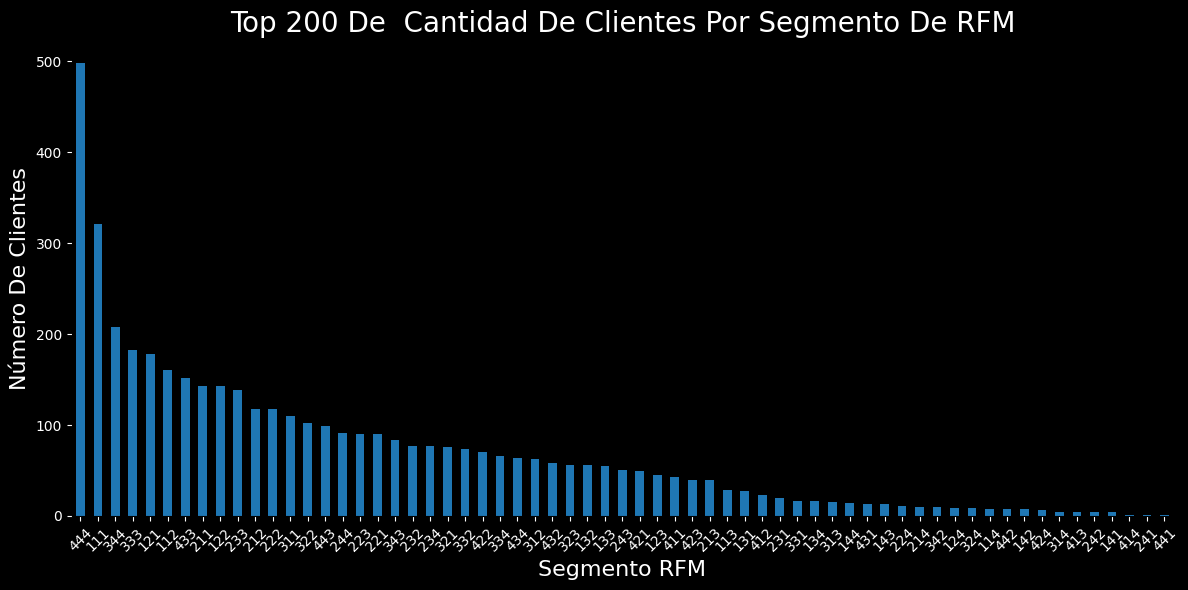

In [40]:
segmentos_top = rfm['RFM_Score'].value_counts().head(200)

fig, ax = plt.subplots(figsize=(12, 6), facecolor='black') 
ax.set_facecolor('black')                                    

segmentos_top.plot(kind='bar', ax=ax)

ax.set_title('Top 200 De  Cantidad De Clientes Por Segmento De RFM', color='white', fontsize=20)
ax.set_xlabel('Segmento RFM', color='white', fontsize=16)
ax.set_ylabel('Número De Clientes', color='white', fontsize=16)

ax.tick_params(axis='x', colors='white', rotation=45, labelsize=10)
ax.tick_params(axis='y', colors='white', labelsize=10)

plt.tight_layout()
plt.show()

### 2.4 Segmentación De Usuarios

In [14]:
def clasificar_segmento(score):
    if score == '444':
        return 'Premium'
    elif score == '111':
        return 'Ocasionales'
    else:
        return 'Mixtos'

rfm['Segmento'] = rfm['RFM_Score'].apply(clasificar_segmento)

rfm

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segmento
0,12346,2011-01-18 10:17:00,326,2,0.00,1,2,1,121,Mixtos
1,12347,2011-12-07 15:52:00,2,7,4310.00,4,4,4,444,Premium
2,12348,2011-09-25 13:13:00,75,4,1797.24,2,3,4,234,Mixtos
3,12349,2011-11-21 09:51:00,19,1,1757.55,3,1,4,314,Mixtos
4,12350,2011-02-02 16:01:00,310,1,334.40,1,1,2,112,Mixtos
...,...,...,...,...,...,...,...,...,...,...
4366,18280,2011-03-07 09:52:00,278,1,180.60,1,2,1,121,Mixtos
4367,18281,2011-06-12 10:53:00,181,1,80.82,1,2,1,121,Mixtos
4368,18282,2011-12-02 11:43:00,8,3,176.60,4,3,1,431,Mixtos
4369,18283,2011-12-06 12:02:00,4,16,2094.88,4,4,4,444,Premium


### 2.5 Grafico De Sgemetacion De Usuarios

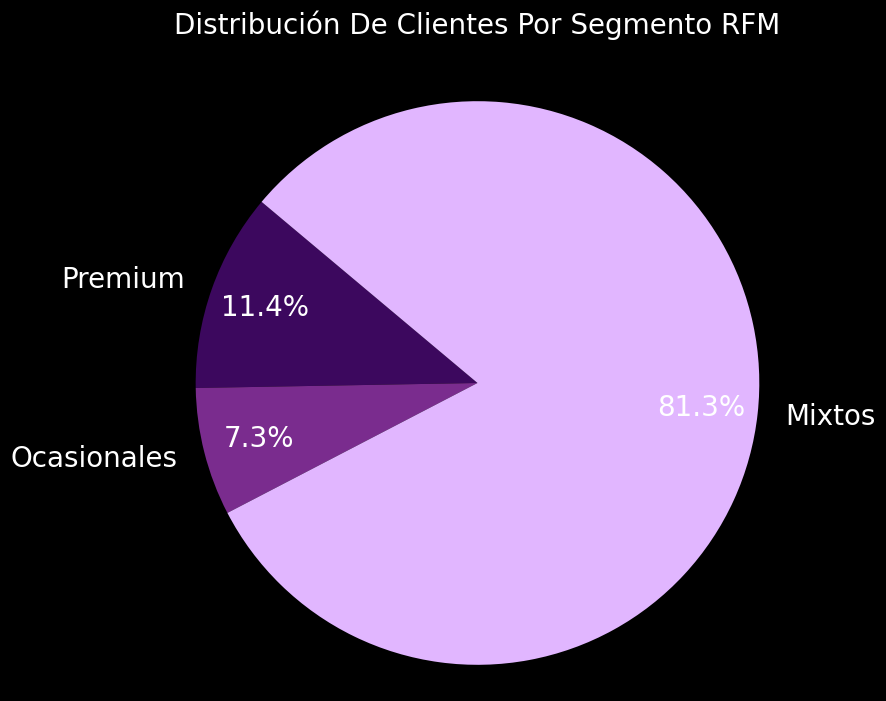

In [27]:
segmentos = rfm['Segmento'].value_counts().reindex(['Premium', 'Ocasionales', 'Mixtos'])

colores = ['#3C085E', '#7A2C8E', '#E1B6FF']

fig = plt.figure(figsize=(8, 8), facecolor='black')
ax = fig.add_subplot(111)
ax.set_facecolor('black')
wedges, texts, autotexts = ax.pie(
    segmentos, 
    labels=segmentos.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colores,
    textprops={'fontsize': 20, 'color': 'white'},
    pctdistance=0.8,
    labeldistance=1.1
)
plt.setp(autotexts, fontsize=20, color='white')

plt.title('Distribución De Clientes Por Segmento RFM', color='white', fontsize=20, pad=30)
plt.axis('equal')
plt.show()

### 2.6 Porcetaje De Gatos De Cada Segemento

In [16]:
df_segmentado = df_ec.merge(rfm[['CustomerID', 'Segmento']], on='CustomerID', how='left')

gasto_por_segmento = df_segmentado.groupby('Segmento')['TotalPrice'].sum().reset_index()

total_general = gasto_por_segmento['TotalPrice'].sum()

gasto_por_segmento['Porcentaje'] = (gasto_por_segmento['TotalPrice'] / total_general) * 100

gasto_por_segmento

,Segmento,TotalPrice,Porcentaje
0,Mixtos,3886783.134,46.828341
1,Ocasionales,40768.540,0.491183
2,Premium,4372514.140,52.680476


### 2.7 Grafico De Porcetaje De Gatos De Cada Segemento

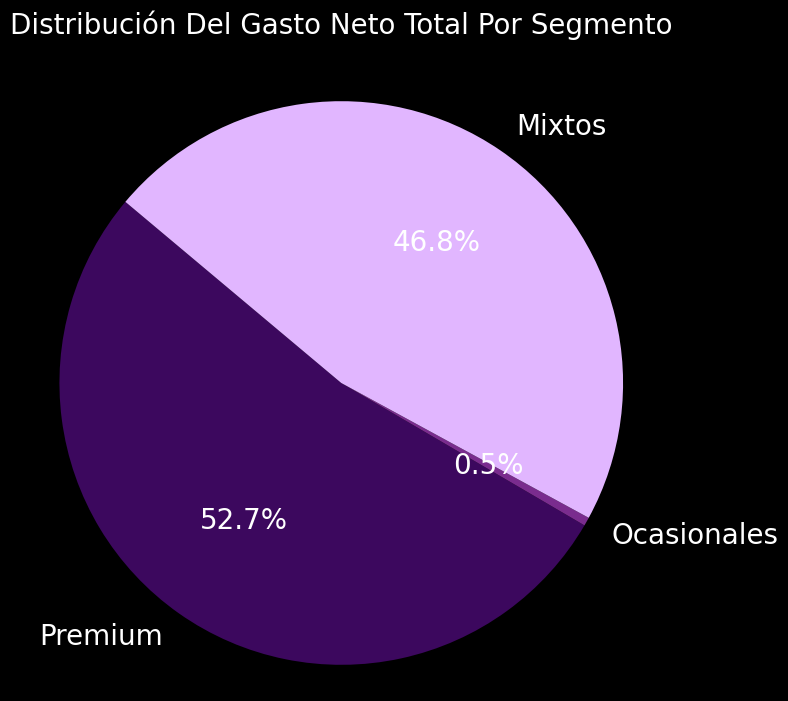

In [29]:
gasto_por_segmento = rfm.groupby('Segmento')['Monetary'].sum().reset_index()
gasto_por_segmento = gasto_por_segmento.rename(columns={'Monetary': 'TotalPrice'})

orden_segmentos = ['Premium', 'Ocasionales', 'Mixtos']
gasto_por_segmento = gasto_por_segmento.set_index('Segmento').reindex(orden_segmentos).reset_index()

colores = ['#3C085E', '#7A2C8E', '#E1B6FF']

plt.figure(figsize=(8, 8), facecolor='black')
wedges, texts, autotexts = plt.pie(
    gasto_por_segmento['TotalPrice'],
    labels=gasto_por_segmento['Segmento'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colores,
    textprops={'fontsize': 20, 'color': 'white'},
    labeldistance=1.1 
)
plt.setp(autotexts, fontsize=20, color='white')
plt.title('Distribución Del Gasto Neto Total Por Segmento', color='white', fontsize=20, pad=30)
plt.axis('equal')
plt.show()

## 3 Machine Learning

### 3.0 Dataset

In [18]:
rfm

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segmento
0,12346,2011-01-18 10:17:00,326,2,0.00,1,2,1,121,Mixtos
1,12347,2011-12-07 15:52:00,2,7,4310.00,4,4,4,444,Premium
2,12348,2011-09-25 13:13:00,75,4,1797.24,2,3,4,234,Mixtos
3,12349,2011-11-21 09:51:00,19,1,1757.55,3,1,4,314,Mixtos
4,12350,2011-02-02 16:01:00,310,1,334.40,1,1,2,112,Mixtos
...,...,...,...,...,...,...,...,...,...,...
4366,18280,2011-03-07 09:52:00,278,1,180.60,1,2,1,121,Mixtos
4367,18281,2011-06-12 10:53:00,181,1,80.82,1,2,1,121,Mixtos
4368,18282,2011-12-02 11:43:00,8,3,176.60,4,3,1,431,Mixtos
4369,18283,2011-12-06 12:02:00,4,16,2094.88,4,4,4,444,Premium


### 3.1 Test De Shapiro-Wilk

In [19]:
variables = ['Recency', 'Frequency', 'Monetary']

for var in variables:
    stat, p = shapiro(rfm[var])
    print(f"Shapiro-Wilk para {var}: Estadístico={stat:.4f}, p-valor={p:.4f}")
    if p > 0.05:
        print(" -> Distribución normal (no se rechaza H0)\n")
    else:
        print(" -> No es normal (se rechaza H0)\n")

Shapiro-Wilk para Recency: Estadístico=0.8106, p-valor=0.0000
 -> No es normal (se rechaza H0)

Shapiro-Wilk para Frequency: Estadístico=0.3774, p-valor=0.0000
 -> No es normal (se rechaza H0)

Shapiro-Wilk para Monetary: Estadístico=0.1407, p-valor=0.0000
 -> No es normal (se rechaza H0)



### 3.2 Boxplot

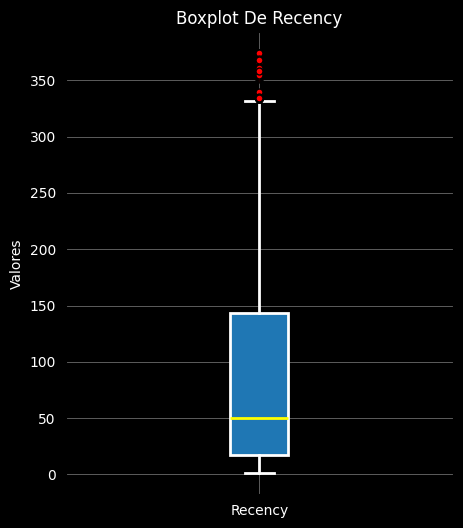

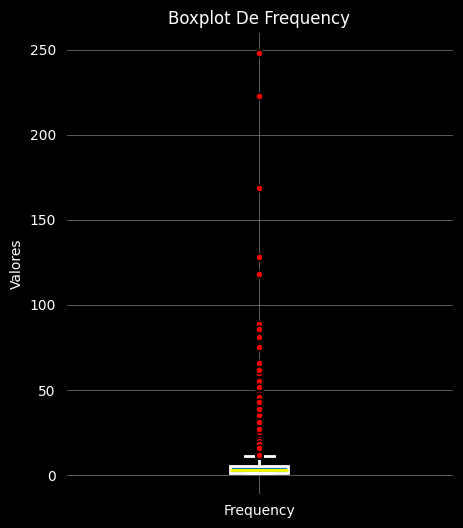

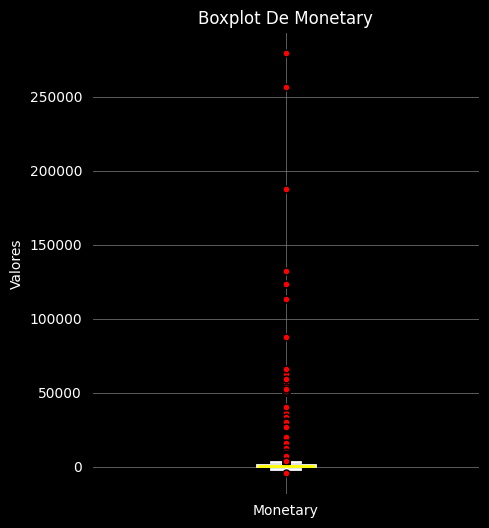

In [20]:
for var in variables:
    plt.figure(figsize=(5, 6), facecolor='black')
    ax = plt.gca()
    ax.set_facecolor('black')
    
    box = plt.boxplot(
        rfm[var], 
        patch_artist=True, 
        boxprops=dict(color='white', linewidth=2), 
        whiskerprops=dict(color='white', linewidth=2),  
        capprops=dict(color='white', linewidth=2),   
        medianprops=dict(color='yellow', linewidth=2), 
        flierprops=dict(markerfacecolor='red', marker='o', color='red', markersize=5) 
    )
    plt.title(f'Boxplot De {var}', color='white')
    plt.ylabel('Valores', color='white')
    plt.xticks([1], [var], color='white')
    plt.yticks(color='white')
    plt.grid(True, color='gray', linewidth=0.5)
    plt.show()

### 3.3 Definicion De Las Variables

In [21]:
X = rfm[['Recency','Frequency','Monetary']]
y = rfm['Segmento']

### 3.4 RobustScaler

In [22]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

### 3.5 Segemetacion De Los Datos De Entramiento/Prueva

In [23]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

### 3.6 Modelo: Random Forest

In [24]:
modelo = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 3.7 Prueva Del Modelo

In [25]:
y_pred = modelo.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Mixtos       0.99      0.97      0.98      1067
 Ocasionales       0.76      0.92      0.83        98
     Premium       1.00      1.00      1.00       147

    accuracy                           0.97      1312
   macro avg       0.92      0.96      0.94      1312
weighted avg       0.98      0.97      0.97      1312



### 3.8 Matriz De Confusion

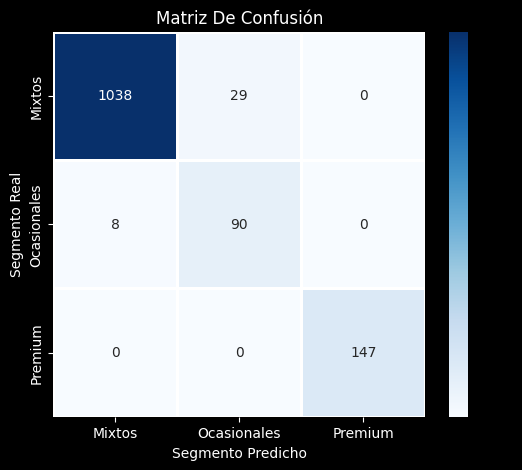

In [26]:
cm = confusion_matrix(y_test, y_pred)
labels = modelo.classes_

plt.figure(figsize=(6, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=labels, 
    yticklabels=labels, 
    cbar=True, 
    linewidths=1, 
    linecolor='white'
)

ax.set_title('Matriz De Confusión', color='white')
ax.set_xlabel('Segmento Predicho', color='white')
ax.set_ylabel('Segmento Real', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.gcf().patch.set_facecolor('black')

plt.show()